# Strukturální fondy
Loni jsem [se hrabal](https://gist.github.com/kokes/052cc2a63e6366fc92b1) v datech od MMR, konkrétně v tabulce projektů za období 2007-2013. A jelikož to [nikoho nezajímalo](https://twitter.com/kondrej/status/604406720471961600), rozhodl jsem se to udělat znovu a pořádněji.

Vše níže uvedné je na základě [dat na webu MMR](http://www.strukturalni-fondy.cz/cs/Informace-o-cerpani/Seznamy-prijemcu). Rozdíl od loňských hrátek je v tom, že MMR v mezičase dodalo mnohem čistší tabulku. Dříve člověk musel párovat projekty na vládní instituce, NACE kategorie atd. Teď to za nás udělalo ministerstvo, takže můžeme stratifikaci prohlížet mnohem snadněji.

Stížnosti do [twitterů](http://twitter.com/kondrej) nebo [mailů](mailto:ondrej.kokes@gmail.com)

*(Kód používá víceméně jen Python 3 a knihovnu `pandas`, klidně si to pusťte)*

In [40]:
import pandas as pd
import numpy as np
import urllib.request
import os
%matplotlib inline

In [41]:
url = 'http://www.strukturalni-fondy.cz/getmedia/d10fe3b0-15f5-4cdb-b916-64be5b4c5c4d/Prehled_projektu_20160406u.xlsx?ext=.xlsx'
fn = 'vstupy/prehled.xlsx'

if not os.path.exists(fn):
    urllib.request.urlretrieve(url, fn)

In [42]:
df = pd.read_excel(fn)
df = df.loc[df.loc[:, 'Pořadí v rámci v projektu (filtr)'] == 1] # kazdy projekt ma vic radku

Celkem máme 75 tisíc projektů z období 2007-2013, ke každému 28 indikátorů, většina je celkem sebevysvětlující.

In [43]:
df.shape

(75137, 28)

In [44]:
df.columns

Index(['Číslo a název programu', 'Číslo prioritní osy',
       'Číslo oblasti podpory', 'Číslo projektu', 'Název projektu',
       'Popis projektu', 'Žadatel', 'IČ žadatele', 'Hosp.právní forma',
       'Hosp.právní forma - skupina', 'Stav projektu',
       'Datum podpisu smlouvy/rozhodnutí', 'Adresa žadatele',
       'Kraj žadatele - kód', 'Kraj žadatele - název', 'Obec žadatele - kód',
       'Obec žadatele - název', 'Celkové zdroje - Sml/Dod',
       'Rozhodnutí/Smlouva o poskytnutí dotace (celkové zdroje)',
       'Rozhodnutí/Smlouva o poskytnutí dotace (veřejné prostředky celkem)',
       'Rozhodnutí/Smlouva o poskytnutí dotace (EU zdroje)',
       'Proplacené prostředky příjemcům - vyúčtované (veřejné prostředky celkem)',
       'Proplacené prostředky příjemcům - vyúčtované (EU zdroje)',
       'Certifikované prostředky (veřejné prostředky celkem)',
       'Certifikované prostředky (EU zdroje)', 'Název NUTS',
       'Pořadí v rámci v projektu (filtr)', 'Počet míst realizace'],
  

In [45]:
# nazvy sloupcu, at se to lip filtruje
prfo = 'Hosp.právní forma'
prfos = 'Hosp.právní forma - skupina'
prog = 'Číslo a název programu'
nuts = 'Název NUTS'
ico = 'IČ žadatele'
zad = 'Žadatel'
stav = 'Stav projektu'
popis = 'Popis projektu'
nazev = 'Název projektu'
celk = 'Celkové zdroje - Sml/Dod'
euz = 'Rozhodnutí/Smlouva o poskytnutí dotace (EU zdroje)'

První tři projekty vypadají takto

In [46]:
df.head(3).T

,0,10,26
Číslo a název programu,CZ.1.01 OP Doprava,CZ.1.01 OP Doprava,CZ.1.01 OP Doprava
Číslo prioritní osy,1.1,1.1,1.1
Číslo oblasti podpory,1.1.1,1.1.1,1.1.1
Číslo projektu,CZ.1.01/1.1.00/06.0019,CZ.1.01/1.1.00/07.0006,CZ.1.01/1.1.00/07.0015
Název projektu,Optimalizace trati Benešov u Prahy - Strančice,Optimalizace trati Horní Dvořiště st. hranice ...,"Rekonstrukce kolejí č.1 a 2 v km 224,391-226,0..."
Popis projektu,"Délka rekonstruovaného úseku je 23,95 km. Stáv...",Vzhledem k již proběhlé částečné optimalizaci ...,V rámci stavby se předpokládá řešit rekonstruk...
Žadatel,"Správa železniční dopravní cesty, státní organ...","Správa železniční dopravní cesty, státní organ...","Správa železniční dopravní cesty, státní organ..."
IČ žadatele,70994234,70994234,70994234
Hosp.právní forma,Správa žel.dopr.cesty,Správa žel.dopr.cesty,Správa žel.dopr.cesty
Hosp.právní forma - skupina,Stát a jeho instituce a organizace,Stát a jeho instituce a organizace,Stát a jeho instituce a organizace


### Další datasety na napojení - veřejné podniky
Sice náš MMR dataset obsahuje informace o státních institucích, seznam není kompletní. Podniky s výrazným podílem státu nebo firmy plně vlastněné kraji, obcemi atd., jsou v datasetu často označené jako běžné akciové společnosti.

Můžeme ale použít dva datasety of ministerstva financí:
- [Seznam vládních institucí v ČR](http://www.mfcr.cz/cs/verejny-sektor/rozpoctove-ramce-statisticke-informace/verejny-sektor/sektor-vladnich-instituci/2016/seznam-vladnich-instituci-v-cr-2016-24749)
- [Seznam veřejných společností v ČR](http://www.mfcr.cz/cs/verejny-sektor/rozpoctove-ramce-statisticke-informace/verejny-sektor/verejne-spolecnosti/2016/seznam-verejnych-spolecnosti-v-cr-2016-24752)

In [322]:
url = 'http://www.mfcr.cz/assets/cs/media/Rozp-ramce-EU-85-2011_2016_Seznam-verejnych-spolecnosti-v-CR.xlsx'
fn = 'vstupy/verejne-instituce.xlsx'

if not os.path.exists(fn):
    urllib.request.urlretrieve(url, fn)
    
url = 'http://www.mfcr.cz/assets/cs/media/Rozp-ramce-EU-85-2011_2016_Seznam-vladnich-instituci-v-CR.xls'
fn = 'vstupy/vladni-instituce.xls'

if not os.path.exists(fn):
    urllib.request.urlretrieve(url, fn)

In [327]:
ver = pd.read_excel('vstupy/verejne-instituce.xlsx', skiprows=4)
ver = ver.iloc[:, 1:]
ver.head(5)

,IČO,NÁZEV,DATUM VZNIKU,FORMA,NACE,SUBSEKTOR
0,46967036,"JUPITER club, s.r.o.",1992-08-03,112,90040,11001
1,48909467,"Služby města Konice, spol. s r.o.",1993-08-18,112,38110,11001
2,25013599,TS HRÁDEK s.r.o.,1996-12-19,112,38110,11001
3,25013866,"Klášterecká kyselka, s.r.o.",1996-12-31,112,47190,11001
4,25020307,Podnik služeb Jirkov s.r.o.,1997-05-06,112,81290,11001


In [328]:
vlad = pd.read_excel('vstupy/vladni-instituce.xls', skiprows=4)
vlad = vlad.iloc[:, 1:]
vlad.head(5)

,IČO,NÁZEV,DATUM VZNIKU,FORMA,NACE,COFOG,SUBSEKTOR
0,26925974,Nemocnice Boskovice s.r.o,2004-04-22,112,86100,NaN,13130
1,3960765,Lesy Drmoul s.r.o.,2015-04-03,112,2100,NaN,13130
2,27577708,Divadla Kladno s.r.o.,2006-08-02,112,90020,NaN,13130
3,26076357,"Strakonická televize, s.r.o.",2004-07-10,112,60200,NaN,13130
4,4510984,"Pošumavská odpadová, s.r.o.",2015-10-26,112,38,NaN,13130


In [336]:
len(ver), len(vlad)

(1172, 18117)

In [358]:
vvico = list(ver.loc[:, 'IČO'].values) + list(vlad.loc[:, 'IČO'].values)
vvico = [str(l).rjust(8, '0') for l in vvico]
vvico = set(vvico)

## První prohrab

Hlavní přídavek oproti předchozímu datasetu je přítomnost klasifikací dle pravních forem.

In [47]:
df.loc[:, prfo].unique()[:10]

array(['Správa žel.dopr.cesty',
       'Správa železniční dopravní cesty, státní organizace',
       'Společnost s r.o.', 'Akciová společnost', 'Příspěvková organizace',
       'Státní příspěvková organizace', 'Kraj', 'Dobrovolný svazek obcí',
       'Obec nebo m.část hl.m.', 'Org. složka státu'], dtype=object)

Ty jsou seskupené do skupin. Nejvíc projektů (ne nutně peněz) připadá na obce.

In [48]:
df.loc[:, prfos].value_counts()

Obce                                   25192
Podnikatelské subjekty                 22118
Ostatní                                15068
Komory, profesní a zájmové sdružení     3221
Stát a jeho instituce a organizace      2542
Neziskový sektor                        1601
Kraje                                   1584
Vzdělávací a výzkumné instituce         1550
Name: Hosp.právní forma - skupina, dtype: int64

## Očista

### Duplikované skupiny

In [86]:
df.loc[:, prfo] = df.loc[:, prfo].replace('Společen.vlast.jednot.', 'Společenství vlastníků jednotek')
df.loc[:, prfo] = df.loc[:, prfo].replace('Reg.rada regionu soudr.', 'Regionální rada regionu soudržnosti')

In [95]:
df.loc[:, prfo] = df.loc[:, prfo].replace('Vysoká škola (veřejná, státní)', 'Vysoká škola')

In [96]:
# df.loc[df.loc[:, prfo].str.contains('Vysok'), prfo].unique()

In [102]:
df.loc[:, prfo] = df.loc[:, prfo].replace('Příspěvková organizace', 'Státní příspěvková organizace')

In [289]:
df.loc[:, prfo] = df.loc[:, prfo].replace('Veř. výzkumná instituce', 'Veřejná výzkumná instituce')

### Veřejné instituce
Čtyři skupiny institucí patří mezi veřejné - obce, kraje, stát, vzdělávací a výzkumné instituce.

In [97]:
erar = 'veřejná instituce'
df.loc[:, erar] = False
df.loc[df.loc[:, prfos].isin(['Obce', 'Kraje', 'Stát a jeho instituce a organizace', 'Vzdělávací a výzkumné instituce']), erar] = True

...ale v 'Ostatní' je i několik skupin, které jsou veřejné.

In [103]:
list(df.loc[df.loc[:, prfos] == 'Ostatní', prfo].unique())

['Státní příspěvková organizace',
 'Příspěvková organizace zřízená územním samosprávným celkem',
 'Fyzická osoba nepodnikající dle Živnost. zákona a nezapsaná v OR',
 'Ústav',
 'Odštěp.záv.zaps.v ob.r.',
 'Společenství vlastníků jednotek',
 'Regionální rada regionu soudržnosti',
 'Zatím neurčeno']

In [112]:
df.loc[df.loc[:, prfo].isin(['Státní příspěvková organizace',
 'Příspěvková organizace zřízená územním samosprávným celkem',
 'Regionální rada regionu soudržnosti']), erar] = True

Taky je pár veřejných institucí mezi žadateli, kteří nemají hlavní nadskupinu.

In [292]:
df.loc[df.loc[:, prfos].isnull(),prfo].unique()[:6]

array(['Veřejná výzkumná instituce', 'Školská právnická osoba',
       'Evropská společnost',
       'Odborová organizace a organizace zaměstnavatelů', 'Ostatní',
       'Zem.podnik.FO nez.v OR'], dtype=object)

In [299]:
df.loc[df.loc[:,prfo].isin(['Veřejná výzkumná instituce', 'Školská právnická osoba']), erar] = True

Poslední zdroj informací budou ty dva datasety of MFČR, které jsme načetli výše. Projdeme tedy podniky, které jsou označené jako soukromé a podíváme se, jestli jeji IČO není v těch dvou datasetech.

In [382]:
dd = df.loc[df.loc[:,erar] == False, [ico, erar]]
for j in dd.iterrows():
    if j[1].loc[ico] not in vvico: continue
    df.loc[j[0], erar] = True

### EIB
Poslední výjimka, v datech je pod IČO 00000000 Evropská investiční banka, EIB. Tak ji přepneme do veřejných.

In [400]:
df.loc[df.loc[:, ico] == '00000000']

,Číslo a název programu,Číslo prioritní osy,Číslo oblasti podpory,Číslo projektu,Název projektu,Popis projektu,Žadatel,IČ žadatele,Hosp.právní forma,Hosp.právní forma - skupina,...,Rozhodnutí/Smlouva o poskytnutí dotace (EU zdroje),Proplacené prostředky příjemcům - vyúčtované (veřejné prostředky celkem),Proplacené prostředky příjemcům - vyúčtované (EU zdroje),Certifikované prostředky (veřejné prostředky celkem),Certifikované prostředky (EU zdroje),Název NUTS,Pořadí v rámci v projektu (filtr),Počet míst realizace,veřejná instituce,poměr vlastních financí (0-1)
100818,CZ.1.10 ROP NUTS II Moravskoslezsko,10.2,10.2.3,CZ.1.10/2.3.00/02.00976,JESSICA Holdingový fond Moravskoslezsko,Evidence financování JESSICA Holdingového fond...,Evropská investiční banka,00000000,Zahraniční osoba,Podnikatelské subjekty,...,506920000.0,430882000.0,506920000.0,430882000.0,CZ0802598003,Frýdek-Místek,1.0,5.0,False,0.0


In [401]:
df.loc[df.loc[:, ico] == '00000000', erar] = True

### Kofinancování

In [50]:
kofi = 'poměr vlastních financí (0-1)'
df.loc[:, kofi] = np.nan
fr = 1-df.loc[:, euz] / df.loc[:, celk]

fr = fr[fr >= 0] # mám pocit že u těch českopolských projektů je celková cena v eurech, ale dotace v korunách (a zlotých)
df.loc[fr.index, kofi] = fr.values

### Čištění o.p.s.

ops bylo někde špatně

In [51]:
df.loc[:, prfo] = df.loc[:, prfo].replace('Obecně prospěšná spol.', 'Obecně prospěšná společnost')

### Negativní dotace

**Negativní dotace.** Nezkoumal sem, jestli chyba nebo pokuta nebo co.

In [119]:
df.loc[df.loc[:, euz]<0, [zad, euz]]

,Žadatel,Rozhodnutí/Smlouva o poskytnutí dotace (EU zdroje)
79295,Odborná střední škola podnikatelská Kolín s.r.o.,-5.820766e-11
112983,AAA BYTY.CZ akciová společnost,-2.849530e+05


### Duplikovaní žadatelé
Máme víc žadatelů než IČO.

In [121]:
print(len(df.loc[:, zad].unique()))


print(len(df.loc[:, ico].unique()))

26944
24847


In [145]:
dd = df.loc[:, [zad,ico]].drop_duplicates().sort_values(by=ico)
dd.index = range(len(dd))
dd.head(3)

,Žadatel,IČ žadatele
0,Dolnośląski Urząd Wojewódzki we Wrocławiu,000 514 3
1,Evropská investiční banka,00000000
2,Uniwersytet Śląski w Katowicach,000001347


In [185]:
df.loc[:, [zad, ico]].drop_duplicates().shape

(28776, 2)

In [230]:
?dd.dropna()

In [234]:
dd = df.loc[:, [zad, ico]].drop_duplicates()
dd = dd.loc[dd.duplicated(subset=ico, keep=False)].sort_values(by=ico)
dd.head(10)

,Žadatel,IČ žadatele
1487,NaN,NaN
21377,"Českomoravská záruční a rozvojová banka, a.s.",NaN
27914,Agentura pro podporu podnikání a investic Czec...,NaN
31744,Ministerstvo průmyslu a obchodu ČR,NaN
34907,Česká agentura na podporu obchodu/CzechTrade,NaN
42486,Zaměstnavatelský svaz důlního a naftového prům...,NaN
56143,OBEC KOSTELEC U HOLEŠOVA,NaN
56144,OBEC CHOMÝŽ,NaN
60812,STATUTÁRNÍ MĚSTO MOST,NaN
60817,OBEC RŮŽOVÁ,NaN


Můžem nahradit duplikovaný názvy.

In [217]:
for j in dd.drop_duplicates(subset=ico).iterrows():
    df.loc[df.loc[:, ico] == j[1].loc[ico], zad] = j[1].loc[zad]

**Furt nějaký zbývaj**

In [249]:
print(len(df.loc[:, zad].unique()))

print(len(df.loc[:, ico].unique()))

24570
24847


Bude možná tím, že v datech jsou mezery.

## Operační programy

In [253]:
prdf = df.loc[:, [prog, euz, erar]].groupby([prog, erar]).sum()
prdf /= 10**6
prdf.round(0).sort_values(by=euz, ascending=False).unstack()

Rozhodnutí/Smlouva o poskytnutí dotace (EU zdroje)  \
veřejná instituce                                                                          False   
Číslo a název programu                                                                             
CZ.1.01 OP Doprava                                                                       10046.0   
CZ.1.02 OP Životní prostředí                                                             36494.0   
CZ.1.03 OP Podnikání a inovace                                                           94114.0   
CZ.1.04 OP Lidské zdroje a zaměstnanost                                                  15786.0   
CZ.1.05 OP Výzkum a vývoj pro inovace                                                    17901.0   
CZ.1.06 Integrovaný operační program                                                      7734.0   
CZ.1.07 OP Vzdělávání pro konkurenceschopnost                                            11081.0   
CZ.1.08 OP Technická pomoc                                                                 106.0   
CZ.1.09 ROP NUTS II Severozápad                                                           4911.0   
CZ.1.10 ROP NUTS II Moravskoslezsko                                                       5834.0   
CZ.1.11 ROP NUTS II Jihovýchod                                                            4577.0   
CZ.1.12 ROP NUTS II Střední Morava                                                        4500.0   
CZ.1.13 ROP NUTS II Severovýchod                                                          6275.0   
CZ.1.14 ROP Jihozápad                                                                     4334.0   
CZ.1.15 ROP NUTS II Střední Čechy                                                         4001.0   
CZ.1.25 OP Rybářství                                                                       694.0   
CZ.2.16 OP Praha Konkurenceschopnost                                                      4377.0   
CZ.2.17 OP Praha Adaptibilita                                                             1911.0   
CZ.3.22 OP ČR - Polsko                                                                     512.0   

                                                         
veřejná instituce                                 True   
Číslo a název programu                                   
CZ.1.01 OP Doprava                             181245.0  
CZ.1.02 OP Životní prostředí                   107551.0  
CZ.1.03 OP Podnikání a inovace                   5062.0  
CZ.1.04 OP Lidské zdroje a zaměstnanost         40574.0  
CZ.1.05 OP Výzkum a vývoj pro inovace           36851.0  
CZ.1.06 Integrovaný operační program            36895.0  
CZ.1.07 OP Vzdělávání pro konkurenceschopnost   40480.0  
CZ.1.08 OP Technická pomoc                       3980.0  
CZ.1.09 ROP NUTS II Severozápad                 16783.0  
CZ.1.10 ROP NUTS II Moravskoslezsko             16957.0  
CZ.1.11 ROP NUTS II Jihovýchod                  18486.0  
CZ.1.12 ROP NUTS II Střední Morava              16975.0  
CZ.1.13 ROP NUTS II Severovýchod                15493.0  
CZ.1.14 ROP Jihozápad                           16234.0  
CZ.1.15 ROP NUTS II Střední Čechy               14623.0  
CZ.1.25 OP Rybářství                              207.0  
CZ.2.16 OP Praha Konkurenceschopnost             2895.0  
CZ.2.17 OP Praha Adaptibilita                    1222.0  
CZ.3.22 OP ČR - Polsko                            504.0

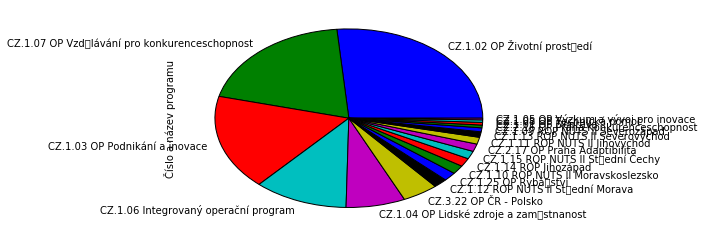

In [54]:
df.loc[:, prog].value_counts().plot(kind='pie')

ten graf je čistá krása

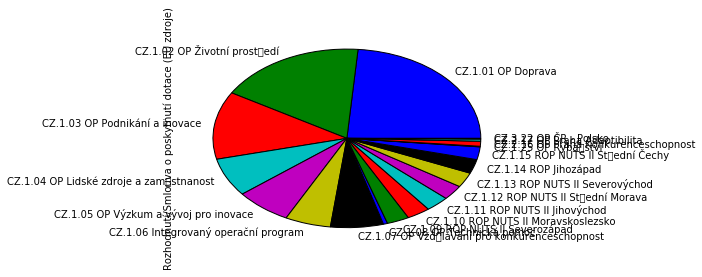

In [254]:
mld = df.groupby(prog).sum().loc[:, euz]/10**9
mld.plot(kind='pie')

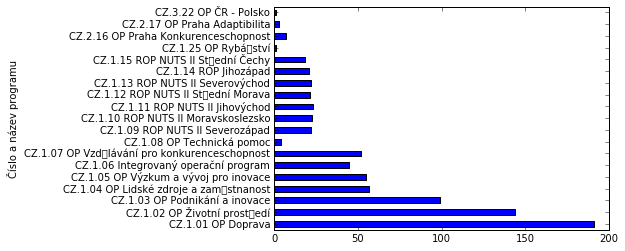

In [255]:
mld.plot(kind='barh')

In [402]:
(df.loc[:, [celk, euz, erar]].groupby(erar).sum()/10**9).round(0)

,Celkové zdroje - Sml/Dod,Rozhodnutí/Smlouva o poskytnutí dotace (EU zdroje)
veřejná instituce,,
False,347.0,173.0
True,856.0,636.0


Jde tedy o cca 800 mld na projekty za 1.2 bilionu, kofinance jsou tedy zhruba třetinová.

In [257]:
df.loc[:, [kofi,erar]].groupby(erar).describe().unstack()

poměr vlastních financí (0-1)                           \
                                          count      mean       std  min   
veřejná instituce                                                          
False                                   28359.0  0.391169  0.248885  0.0   
True                                    43061.0  0.160204  0.181071  0.0   

                                                           
                        25%       50%       75%       max  
veřejná instituce                                          
False              0.136191  0.471611  0.600000  1.358232  
True               0.002426  0.101527  0.252178  1.000000

**chyba v mejch počtech (max > 1)**

## Nejvíc

### Veřejné

In [393]:
top = df.groupby([zad,ico]).sum().loc[:, [euz]].sort_values(by=euz, ascending=False)/10**9
top.head(20)

,,Rozhodnutí/Smlouva o poskytnutí dotace (EU zdroje)
Žadatel,IČ žadatele,
Ředitelství silnic a dálnic ČR,65993390,96.057743
"Správa železniční dopravní cesty, státní organizace",70994234,79.466513
MINISTERSTVO PRÁCE A SOCIÁLNÍCH VĚCÍ,00551023,20.226537
"Dopravní podnik hl.m. Prahy ,akciová společnost",00005886,11.874581
Moravskoslezský kraj,70890692,10.898059
Masarykova univerzita,00216224,10.800979
Ministerstvo vnitra,00007064,7.751601
ÚŘAD PRÁCE ČESKÉ REPUBLIKY,72496991,7.735390
"České dráhy, a.s.",70994226,7.636482


### Podle projektu

In [423]:
df.loc[df.loc[:, zad].str.contains('Dopravní podnik').replace(np.nan, False)].sum()/10**6

Celkové zdroje - Sml/Dod                                                    33837.531701
Rozhodnutí/Smlouva o poskytnutí dotace (celkové zdroje)                     29852.528831
Rozhodnutí/Smlouva o poskytnutí dotace (veřejné prostředky celkem)          15255.037558
Rozhodnutí/Smlouva o poskytnutí dotace (EU zdroje)                          17754.157106
Proplacené prostředky příjemcům - vyúčtované (veřejné prostředky celkem)    13913.548501
Proplacené prostředky příjemcům - vyúčtované (EU zdroje)                    11026.709332
Certifikované prostředky (veřejné prostředky celkem)                         8535.332478
Pořadí v rámci v projektu (filtr)                                               0.000065
Počet míst realizace                                                            0.000173
veřejná instituce                                                               0.000065
poměr vlastních financí (0-1)                                                   0.000019
dtype: float64

In [424]:
df.loc[df.loc[:, zad].str.contains('Dopravní podnik').replace(np.nan, False), zad].unique()

array(['Dopravní podnik hl.m. Prahy ,akciová společnost',
       'Dopravní podnik města Brna,a.s.', 'Dopravní podnik Ostrava a.s.',
       'Dopravní podnik měst Chomutova a Jirkova a.s.',
       'Dopravní podnik města Ústí nad Labem a.s.',
       'Dopravní podnik města Hradce Králové, a.s.',
       'Dopravní podnik měst Liberce a Jablonce nad Nisou, a.s.',
       'Dopravní podnik města Olomouce, a.s.',
       'Dopravní podnik města Jihlavy, a.s.',
       'Dopravní podnik města Pardubic a.s.',
       'Dopravní podnik města České Budějovice, a.s.',
       'Dopravní podnik Mladá Boleslav, s.r.o.'], dtype=object)

In [410]:
# df.loc[df.loc[:, erar] == True].([prog, zad]).sum()

In [403]:
top_priv = df.loc[~df.loc[:, erar], :]
top_priv = top_priv.groupby([zad,ico]).sum().loc[:, [euz]].sort_values(by=euz, ascending=False)/10**9
top_priv.head(20)

,,Rozhodnutí/Smlouva o poskytnutí dotace (EU zdroje)
Žadatel,IČ žadatele,
"TŘINECKÉ ŽELEZÁRNY, a. s.",18050646,2.300128
ArcelorMittal Ostrava a.s.,45193258,1.676587
Dolní oblast VÍTKOVICE,75125285,1.273931
"Veolia Energie ČR, a.s.",45193410,0.956849
"VÚTS, a.s.",46709002,0.770943
Svaz VKMO s.r.o.,25572245,0.703694
SVAZ MĚST A OBCÍ ČESKÉ REPUBLIKY,63113074,0.657223
"Unipetrol výzkumně vzdělávací centrum, a.s.",62243136,0.587261
"Elektrárny Opatovice, a.s.",28800621,0.582806


Použít:
- MFČR vládní instituce
- ten 'public corporations' spreadsheet

## Golf a hotely

In [59]:
len(df.loc[df.loc[:, nazev].str.contains('golf')])

7

In [60]:
df.loc[df.loc[:, 'Název projektu'].str.contains('golf')].sum()/10**6

Celkové zdroje - Sml/Dod                                                    301.591621
Rozhodnutí/Smlouva o poskytnutí dotace (celkové zdroje)                     114.436966
Rozhodnutí/Smlouva o poskytnutí dotace (veřejné prostředky celkem)           97.710381
Rozhodnutí/Smlouva o poskytnutí dotace (EU zdroje)                           97.181489
Proplacené prostředky příjemcům - vyúčtované (veřejné prostředky celkem)     82.604265
Proplacené prostředky příjemcům - vyúčtované (EU zdroje)                     97.181489
Certifikované prostředky (veřejné prostředky celkem)                         82.604265
Pořadí v rámci v projektu (filtr)                                             0.000007
Počet míst realizace                                                          0.000009
veřejná instituce                                                             0.000001
poměr vlastních financí (0-1)                                                 0.000004
dtype: float64

## Neziskovky

In [61]:
nzs = df.loc[df.loc[:, prfos] == 'Neziskový sektor']
nzs.sum()/10**6

Celkové zdroje - Sml/Dod                                                    12289.535662
Rozhodnutí/Smlouva o poskytnutí dotace (celkové zdroje)                     10955.134618
Rozhodnutí/Smlouva o poskytnutí dotace (veřejné prostředky celkem)           9447.943825
Rozhodnutí/Smlouva o poskytnutí dotace (EU zdroje)                           9921.203777
Proplacené prostředky příjemcům - vyúčtované (veřejné prostředky celkem)     8555.709538
Proplacené prostředky příjemcům - vyúčtované (EU zdroje)                     6682.267296
Certifikované prostředky (veřejné prostředky celkem)                         5755.224942
Pořadí v rámci v projektu (filtr)                                               0.001601
Počet míst realizace                                                            0.004977
veřejná instituce                                                               0.000000
poměr vlastních financí (0-1)                                                   0.000177
dtype: float64

In [62]:
nzs.shape

(1601, 30)

In [65]:
nejnzs = nzs.groupby(zad).sum().sort_values(ascending=False, by=euz)/10**6

nejnzs.loc[:, [euz]].head(10).round(0)

,Rozhodnutí/Smlouva o poskytnutí dotace (EU zdroje)
Žadatel,
Techmania Science Center o.p.s.,572.0
Kanonie premonstrátů Teplá,497.0
Římskokatolická farnost Velehrad,408.0
"IQLANDIA, o.p.s.",407.0
Federace židovských obcí v České republice,285.0
"Energeia, o.p.s.",254.0
"Člověk v tísni, o.p.s.",244.0
Benediktinské opatství sv. Václava v Broumově,196.0
"Muzeum a společenské centrum Dobrovice, o.p.s.",163.0


In [66]:
gmil = nzs.groupby([prfo, zad]).sum().loc[:, euz]/10**6

neziskovky bez církví

In [67]:
ncmil = nzs.loc[~nzs.loc[:, prfo].str.contains('írk')]

In [68]:
dfmil = pd.DataFrame(ncmil.groupby([prfo, zad]).sum().loc[:, euz]/10**6)
dfmil.sort_values(by=euz, ascending=False).head(10).round(0)

Rozhodnutí/Smlouva o poskytnutí dotace (EU zdroje)
Hosp.právní forma           Žadatel                                                                                               
Obecně prospěšná společnost Techmania Science Center o.p.s.                                                                 572.0 
                            IQLANDIA, o.p.s.                                                                                407.0 
                            Energeia, o.p.s.                                                                                254.0 
                            Člověk v tísni, o.p.s.                                                                          244.0 
                            Muzeum a společenské centrum Dobrovice, o.p.s.                                                  163.0 
                            Centrála cestovního ruchu Východní Moravy, o.p.s.                                               136.0 
                            OSTROV ZDRAVÍ o.p.s.                                                                            128.0 
Nadace                      ,, Nadace Josefa Viewegha Sklářská huť František "                                              127.0 
                            Nadace Partnerství (v mezinárodním styku "Czech...                                               92.0 
Obecně prospěšná společnost Vyšší odborná škola DAKOL a Střední škola DAKOL...                                               86.0

## Agrofert

## Obce
per capita? jsou někde deviace?

Škromachovic

In [425]:
df.loc[:, zad].str.contains('Rohatec').sum()

4

In [426]:
df.loc[df.loc[:, nuts] == 'Rohatec'].sum()/10**6

Celkové zdroje - Sml/Dod                                                    326.411804
Rozhodnutí/Smlouva o poskytnutí dotace (celkové zdroje)                     183.536061
Rozhodnutí/Smlouva o poskytnutí dotace (veřejné prostředky celkem)          163.902748
Rozhodnutí/Smlouva o poskytnutí dotace (EU zdroje)                          168.626124
Proplacené prostředky příjemcům - vyúčtované (veřejné prostředky celkem)    150.920879
Proplacené prostředky příjemcům - vyúčtované (EU zdroje)                    144.642873
Certifikované prostředky (veřejné prostředky celkem)                        129.313003
Pořadí v rámci v projektu (filtr)                                             0.000037
Počet míst realizace                                                          0.000037
veřejná instituce                                                             0.000011
poměr vlastních financí (0-1)                                                 0.000016
dtype: float64

In [427]:
(df.loc[df.loc[:, nuts] == 'Rohatec', [prog, euz, erar]].groupby([erar, prog]).sum()/10**6).unstack().round(0)

Rozhodnutí/Smlouva o poskytnutí dotace (EU zdroje)  \
Číslo a název programu                       CZ.1.02 OP Životní prostředí   
veřejná instituce                                                           
False                                                                15.0   
True                                                                 26.0   

                                                       \
Číslo a název programu CZ.1.03 OP Podnikání a inovace   
veřejná instituce                                       
False                                           111.0   
True                                              NaN   

                                                                \
Číslo a název programu CZ.1.04 OP Lidské zdroje a zaměstnanost   
veřejná instituce                                                
False                                                      4.0   
True                                                       NaN   

                                                             \
Číslo a název programu CZ.1.06 Integrovaný operační program   
veřejná instituce                                             
False                                                   NaN   
True                                                    0.0   

                                                                      \
Číslo a název programu CZ.1.07 OP Vzdělávání pro konkurenceschopnost   
veřejná instituce                                                      
False                                                            NaN   
True                                                             3.0   

                                                       
Číslo a název programu CZ.1.11 ROP NUTS II Jihovýchod  
veřejná instituce                                      
False                                             NaN  
True                                              9.0

In [432]:
ver.loc[:, 'NÁZEV'].str.contains('Holovo').sum()

0

### TODO
- <strike>kontroluj erár (po implementaci Ostatní) vůči MFČR seznamu (v dubnu novej)</strike>
- <strike>**dopravní podnik prahy je vedenej jako podnikatelskej subjekt**</strike>
 - <strike>45274649 28196678 26827719 00005886 25508881 61974757 - tohle jsou příklady IČA eráru, který jsou podnikatelé v datasetu</strike>
 - <strike>jinej mfcr seznam http://www.mfcr.cz/cs/verejny-sektor/rozpoctove-ramce-statisticke-informace/verejny-sektor/verejne-spolecnosti/2016/seznam-verejnych-spolecnosti-v-cr-2016-24752 -nezapomeň lpadnout nulama (třeba DPP je bez nul)</strike>
- vyřešit pořadí projektů - jsou ty skrytý řádky důležitý?
- <strike>roztřídit Ostatní mezi soukromý a veřejný (je tam toho pár)</strike>
- rozkouskovat na stages - příprava, realizace, zaplacení, certifikace
- všechny tabulky dělat pro všechny peněžní metriky
- Česko-Polsko vyřešit (je to ale jen cca 1 mld)
- <strike>uložit názvy sloupců do proměnných</strike>
- kofinance + histogram kofinančních poměrů
- <strike>přidat dummy sloupec - veřejné či ne</strike>
- <strike>rozdělení na operační programy</strike>
- dotace per capita (dotace pro veřejnost i soukromníky)
- Agrofert, jako minule, ze závěrky; + pivovary, škoda, soukromý sš/vš, učiliště, ...; scio; křetinský, penta, ppf atd., soláry
- doprava - SŽDC, ŘSD atd.
- CzechTrade, Czech Tourism atd.; Odbory
- <strike>rozlišit v rámci neziskovek na církve, ops, ...</strike>
- uklidit
 - <strike>např. obecně prospěšný společnosti (viz výše)</strike>
 - <strike>VŠ a VŠ (státní) jsou zvlášť, ale ve skutečnosti jsou jedno (soukromý VŠ jsou v podnikatelích)</strike>
 - <strike>Ostatní -> ústav zařadit mezi neziskovky (je to forma ops)</strike>
- <strike>najít firmy s významným podílem státu (ČD, Ruzyň, ČEZ)</strike>
- <strike>IČO a názvů žadatelů jsou různý počty - unifikuj</strike>
- podnikatelský subjekty rozkouskovat podle Čísla prioritní osy (a/nebo Čísla oblasti podpory) - 3.2.2 je CZC nebo Zoner
